#INSURANCE CLAIM PREDICTION

###Create a predictive model which will help the insurance marketing team to know which customer will buy the product.

#1.LOAD DATASET

###We load the insurance dataset into a DataFrame to begin analysis and modeling.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/train.csv')
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48787,122401,0,2,1,2,1,0,0,0,0,...,7.0,0.0,3.0,17.0,0.0,1.0,1.0,0.0,0.0,0.0
48788,122405,0,1,1,2,1,0,0,0,1,...,12.0,2.0,6.0,7.0,0.0,1.0,1.0,0.0,0.0,1.0
48789,122406,0,0,1,7,1,0,1,0,0,...,1.0,0.0,1.0,10.0,0.0,1.0,1.0,1.0,0.0,0.0
48790,122409,0,0,2,1,0,-1,1,0,0,...,2.0,0.0,5.0,6.0,1.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
df.head(25)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
5,19,0,5,1,4,0,0,0,0,0,...,4.0,2.0,0.0,9.0,0.0,1.0,0.0,1.0,1.0,1.0
6,20,0,2,1,3,1,0,0,1,0,...,3.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0,1.0,0.0
7,22,0,5,1,4,0,0,1,0,0,...,7.0,1.0,3.0,6.0,1.0,0.0,1.0,0.0,1.0,0.0
8,26,0,5,1,3,1,0,0,0,1,...,4.0,2.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0
9,28,1,1,1,2,0,0,0,1,0,...,3.0,5.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48792 entries, 0 to 48791
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              48792 non-null  int64  
 1   target          48792 non-null  int64  
 2   ps_ind_01       48792 non-null  int64  
 3   ps_ind_02_cat   48792 non-null  int64  
 4   ps_ind_03       48792 non-null  int64  
 5   ps_ind_04_cat   48792 non-null  int64  
 6   ps_ind_05_cat   48792 non-null  int64  
 7   ps_ind_06_bin   48792 non-null  int64  
 8   ps_ind_07_bin   48792 non-null  int64  
 9   ps_ind_08_bin   48792 non-null  int64  
 10  ps_ind_09_bin   48792 non-null  int64  
 11  ps_ind_10_bin   48792 non-null  int64  
 12  ps_ind_11_bin   48792 non-null  int64  
 13  ps_ind_12_bin   48792 non-null  int64  
 14  ps_ind_13_bin   48792 non-null  int64  
 15  ps_ind_14       48792 non-null  int64  
 16  ps_ind_15       48792 non-null  int64  
 17  ps_ind_16_bin   48792 non-null 

In [ ]:
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [ ]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,48792.000000,48792.000000,48792.000000,48792.000000,48792.000000,48792.000000,48792.000000,48792.000000,48792.000000,48792.000000,...,48791.000000,48791.000000,48791.000000,48791.000000,48791.000000,48791.000000,48791.000000,48791.000000,48791.000000,48791.000000
mean,61197.079706,0.036748,1.899574,1.352496,4.412732,0.417753,0.408100,0.393692,0.255267,0.164371,...,5.458179,1.442479,2.871657,7.531266,0.123199,0.630260,0.556312,0.288537,0.351540,0.154311
std,35242.663752,0.188144,1.986107,0.657621,2.694316,0.493485,1.354549,0.488573,0.436016,0.370616,...,2.344733,1.202088,1.687070,2.753202,0.328669,0.482739,0.496824,0.453087,0.477456,0.361251
min,7.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30708.750000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61052.500000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,91643.250000,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,122411.000000,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,9.000000,12.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(48792, 59)

In [ ]:
df['target'].value_counts()

,count
target,
0,46999
1,1793


In [ ]:
target='target'
print("Target type:",df[target].dtype)
print("Unique values:",df[target].dtype)
print(df[target].value_counts(dropna=False))


Target type: int64
Unique values: int64
target
0    46999
1     1793
Name: count, dtype: int64


In [ ]:
df.isnull().sum()

,0
id,0
target,0
ps_ind_01,0
ps_ind_02_cat,0
ps_ind_03,0
ps_ind_04_cat,0
ps_ind_05_cat,0
ps_ind_06_bin,0
ps_ind_07_bin,0
ps_ind_08_bin,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [ ]:
df['id'].nunique()

48792

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
print('Unique Column Values:')
for col in df.columns:
  print(f'{col}: {df[col].nunique()}')

Unique Column Values:
target: 2
ps_ind_01: 8
ps_ind_02_cat: 5
ps_ind_03: 12
ps_ind_04_cat: 3
ps_ind_05_cat: 8
ps_ind_06_bin: 2
ps_ind_07_bin: 2
ps_ind_08_bin: 2
ps_ind_09_bin: 2
ps_ind_10_bin: 2
ps_ind_11_bin: 2
ps_ind_12_bin: 2
ps_ind_13_bin: 2
ps_ind_14: 4
ps_ind_15: 14
ps_ind_16_bin: 2
ps_ind_17_bin: 2
ps_ind_18_bin: 2
ps_reg_01: 10
ps_reg_02: 19
ps_reg_03: 4181
ps_car_01_cat: 13
ps_car_02_cat: 2
ps_car_03_cat: 3
ps_car_04_cat: 10
ps_car_05_cat: 3
ps_car_06_cat: 18
ps_car_07_cat: 3
ps_car_08_cat: 2
ps_car_09_cat: 6
ps_car_10_cat: 3
ps_car_11_cat: 104
ps_car_11: 4
ps_car_12: 121
ps_car_13: 21475
ps_car_14: 699
ps_car_15: 15
ps_calc_01: 10
ps_calc_02: 10
ps_calc_03: 10
ps_calc_04: 6
ps_calc_05: 7
ps_calc_06: 10
ps_calc_07: 10
ps_calc_08: 10
ps_calc_09: 8
ps_calc_10: 23
ps_calc_11: 20
ps_calc_12: 10
ps_calc_13: 13
ps_calc_14: 23
ps_calc_15_bin: 2
ps_calc_16_bin: 2
ps_calc_17_bin: 2
ps_calc_18_bin: 2
ps_calc_19_bin: 2
ps_calc_20_bin: 2


In [ ]:
df['target'].value_counts()

,count
target,
0,46999
1,1793


#2.EXPLORATORY DATA ANALYSIS

###Due to privacy restrictions, the dataset does not include feature names. As a result, exploratory data analysis (EDA) cannot be conducted in an interpretable manner.

#3.DATA PREPROCESSING

###Outliers are not removed because the feature names and meanings are unavailable, making it impossible to study their distributions.
###Encoding is not performed because there are no object-type (categorical) columns that require encoding or transformation.

In [ ]:
# To filling the missing values
df.fillna(df.mean(),inplace=True)

In [ ]:
df.isnull().sum()

,0
target,0
ps_ind_01,0
ps_ind_02_cat,0
ps_ind_03,0
ps_ind_04_cat,0
ps_ind_05_cat,0
ps_ind_06_bin,0
ps_ind_07_bin,0
ps_ind_08_bin,0
ps_ind_09_bin,0


In [ ]:
df.shape

(48792, 58)

#4.Train Test Split

###Train-Test Split is the process of dividing the dataset into two parts: one for training the model and one for testing it. The training set is used to teach the model the patterns in the data, while the test set is used to check how well the model performs on new, unseen data. This helps us understand how accurately the model can make predictions in real situations.

In [ ]:
x=df.drop('target',axis=1)
y=df['target']

###4.1 Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled


,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0.285714,0.6,0.454545,1.0,0.142857,0.0,1.0,0.0,0.0,0.0,...,0.473684,0.111111,0.416667,0.363636,0.000000,1.00000,1.000000,0.000000,0.00000,1.000000
1,0.142857,0.4,0.636364,0.5,0.142857,0.0,0.0,1.0,0.0,0.0,...,0.157895,0.111111,0.083333,0.409091,0.000000,1.00000,1.000000,0.000000,1.00000,0.000000
2,0.714286,1.0,0.818182,1.0,0.142857,0.0,0.0,1.0,0.0,0.0,...,0.210526,0.222222,0.583333,0.318182,0.000000,1.00000,1.000000,0.000000,1.00000,0.000000
3,0.000000,0.4,0.181818,0.5,0.142857,1.0,0.0,0.0,0.0,0.0,...,0.105263,0.222222,0.333333,0.409091,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
4,0.000000,0.6,0.000000,1.0,0.142857,1.0,0.0,0.0,0.0,0.0,...,0.157895,0.111111,0.083333,0.136364,0.000000,0.00000,0.000000,1.000000,1.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48787,0.285714,0.4,0.181818,1.0,0.142857,0.0,0.0,0.0,1.0,0.0,...,0.368421,0.000000,0.250000,0.772727,0.000000,1.00000,1.000000,0.000000,0.00000,0.000000
48788,0.142857,0.4,0.181818,1.0,0.142857,0.0,0.0,1.0,0.0,0.0,...,0.631579,0.222222,0.500000,0.318182,0.000000,1.00000,1.000000,0.000000,0.00000,1.000000
48789,0.000000,0.4,0.636364,1.0,0.142857,1.0,0.0,0.0,0.0,0.0,...,0.052632,0.000000,0.083333,0.454545,0.000000,1.00000,1.000000,1.000000,0.00000,0.000000
48790,0.000000,0.6,0.090909,0.5,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.105263,0.000000,0.416667,0.272727,1.000000,1.00000,1.000000,1.000000,0.00000,0.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

##SMOTE(Synthetic Minority Over-sampling Technique) is an oversampling technique used to handle imbalanced datasets in classification problems. Instead of simply duplicating minority class samples, SMOTE creates synthetic new samples by interpolating between existing minority samples.

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train_res,y_train_res=smote.fit_resample(x_train,y_train)

In [ ]:
x_train_res

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0.142857,0.4,0.272727,0.50000,0.142857,1.0,0.0,0.0,0.0,0.0,...,0.210526,0.111111,0.166667,0.454545,0.000000,0.000000,1.000000,0.000000,0.0,1.000000
1,0.000000,0.6,0.090909,0.50000,0.142857,1.0,0.0,0.0,0.0,0.0,...,0.473684,0.111111,0.416667,0.545455,0.000000,1.000000,0.000000,1.000000,0.0,0.000000
2,0.285714,0.4,0.727273,0.50000,0.142857,0.0,0.0,1.0,0.0,0.0,...,0.263158,0.111111,0.333333,0.136364,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.4,0.181818,0.50000,0.142857,0.0,1.0,0.0,0.0,0.0,...,0.315789,0.333333,0.166667,0.318182,0.000000,1.000000,1.000000,0.000000,0.0,0.000000
4,0.142857,0.4,0.181818,1.00000,0.142857,0.0,1.0,0.0,0.0,0.0,...,0.263158,0.222222,0.166667,0.272727,0.000000,1.000000,1.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75219,0.142857,0.4,0.379494,0.50000,0.220516,1.0,0.0,0.0,0.0,0.0,...,0.201346,0.212531,0.219235,0.442652,0.456391,1.000000,1.000000,0.000000,0.0,0.000000
75220,0.285714,0.4,0.189448,1.00000,0.194473,0.0,1.0,0.0,0.0,0.0,...,0.128696,0.151256,0.310218,0.472133,0.000000,0.361308,1.000000,1.000000,0.0,0.638692
75221,0.036886,0.8,0.589418,1.00000,0.682085,0.0,0.0,0.0,1.0,0.0,...,0.302200,0.164845,0.043033,0.249255,0.000000,1.000000,1.000000,1.000000,0.0,0.000000
75222,0.714286,0.4,0.526829,0.77561,0.142857,0.0,1.0,0.0,0.0,0.0,...,0.139666,0.160975,0.258537,0.227273,0.000000,1.000000,1.000000,0.448779,1.0,0.000000


In [ ]:
y_train_res

,target
0,0
1,0
2,0
3,0
4,0
...,...
75219,1
75220,1
75221,1
75222,1


#5.Model Building

###Model Building is the step where different machine learning algorithms are applied to the training data to learn patterns and relationships. In this stage, we select suitable classification models, train them using the training dataset, and prepare them to make predictions. The goal of model building is to create a model that can correctly identify whether a customer will buy the product based on the given features.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=500)
lr.fit(x_train_res,y_train_res)

LogisticRegression(max_iter=500)

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.5841787068347166

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train_res,y_train_res)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9618813403012604

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train_res,y_train_res)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9618813403012604

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=100,random_state=42)
gb.fit(x_train_res,y_train_res)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred=gb.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9618813403012604

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=500,learning_rate=0.05,max_depth=6,random_state=42)
xgb.fit(x_train_res,y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred=xgb.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9618813403012604

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = rf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

In [ ]:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[9387    0]
 [ 372    0]]


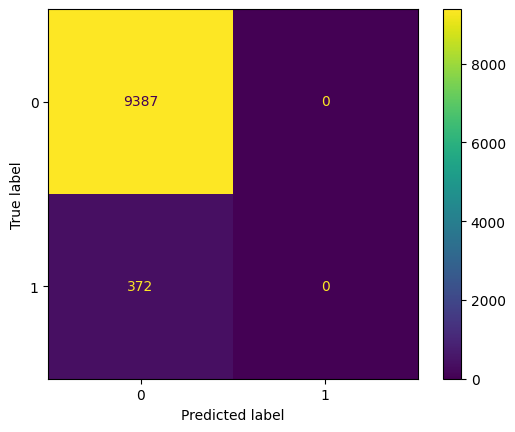

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
results = []
names = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"]

#For Logistic Regression
y_pred_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
results.append({"Model": "Logistic Regression", "Accuracy": accuracy_lr})

#For Gradient Boosting
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
results.append({"Model": "Decision Tree", "Accuracy": accuracy_dt})

# For Random Forest
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results.append({"Model": "Random Forest", "Accuracy": accuracy_rf})

# For Gradient Boosting
y_pred_gb = gb.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
results.append({"Model": "Gradient Boosting", "Accuracy": accuracy_gb})

# For XGBoost
y_pred_xgb = xgb.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
results.append({"Model": "XGBoost", "Accuracy": accuracy_xgb})

print(results)

[{'Model': 'Logistic Regression', 'Accuracy': 0.5841787068347166}, {'Model': 'Decision Tree', 'Accuracy': 0.9110564607029409}, {'Model': 'Random Forest', 'Accuracy': 0.9618813403012604}, {'Model': 'Gradient Boosting', 'Accuracy': 0.9618813403012604}, {'Model': 'XGBoost', 'Accuracy': 0.9618813403012604}]


In [ ]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("Model Comparison Results:")
display(results_df)

Model Comparison Results:


,Model,Accuracy
2,Random Forest,0.961881
4,XGBoost,0.961881
3,Gradient Boosting,0.961881
1,Decision Tree,0.911056
0,Logistic Regression,0.584179


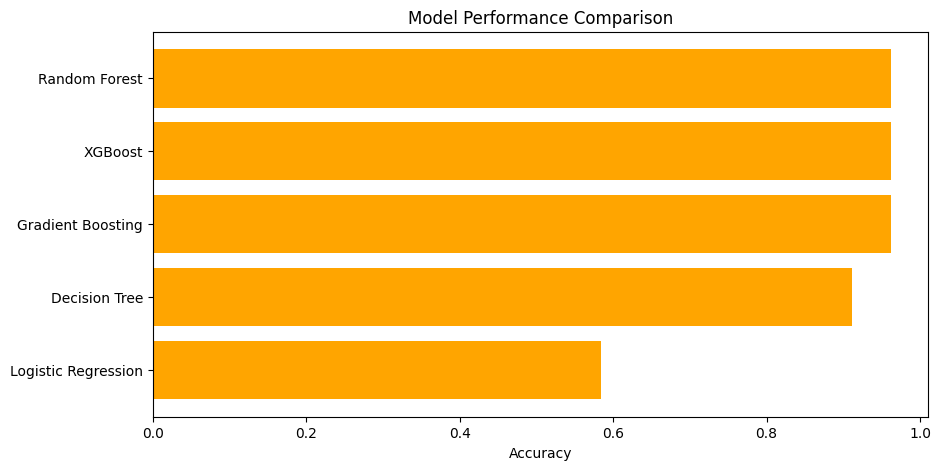

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(results_df["Model"], results_df["Accuracy"], color='orange')
plt.xlabel("Accuracy")
plt.title("Model Performance Comparison")
plt.gca().invert_yaxis()
plt.show()